In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline
airlines_df = pd.read_csv("Airlines.csv")

source: https://www.kaggle.com/datasets/ulrikthygepedersen/airlines-delay

In [2]:
airlines_df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [3]:
airport_list = airlines_df['AirportFrom'].unique()

In [4]:
def get_delay_count_by_port(start_port, end_port=None):
    if end_port is None:
        return len(airlines_df[(airlines_df['AirportFrom'] == start_port)&(airlines_df['Delay'] == 1)])

    else:
        return len(airlines_df[((airlines_df['AirportFrom'] == start_port)&(airlines_df['AirportTo'] == end_port))&(airlines_df['Delay'] == 1)])

def get_delay_count_by_day(day_of_week):
    return len(airlines_df[(airlines_df['DayOfWeek'] == day_of_week)&(airlines_df['Delay'] == 1)])

In [5]:
day_df = airlines_df.groupby(['DayOfWeek'])

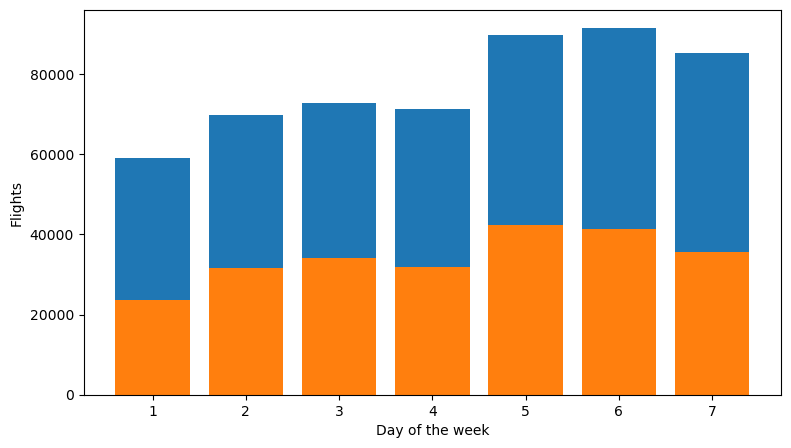

In [6]:
x_val = airlines_df['DayOfWeek'].unique()
y_valB = day_df['Delay'].sum()
y_valA = day_df['Delay'].count()

plt.figure(figsize=(9,5))
plt.bar(x_val, y_valA)
plt.bar(x_val, y_valB)
plt.xlabel('Day of the week')
plt.ylabel('Flights')
plt.show()

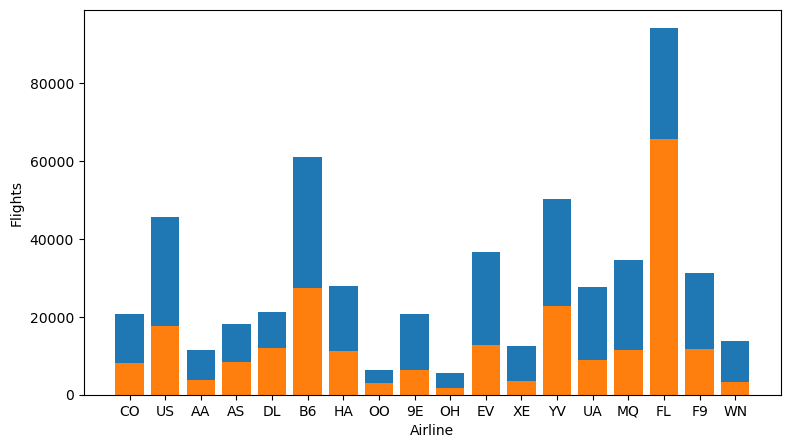

In [7]:
x_val3 = airlines_df['Airline'].unique()
y_val3B = airlines_df.groupby(['Airline'])['Delay'].sum()
y_val3A = airlines_df.groupby(['Airline'])['Delay'].count()

plt.figure(figsize=(9,5))
plt.bar(x_val3, y_val3A)
plt.bar(x_val3, y_val3B)
plt.xlabel('Airline')
plt.ylabel('Flights')
plt.show()

[Text(0, 0, '40'),
 Text(0, 0, '39'),
 Text(0, 0, '34'),
 Text(0, 0, '47'),
 Text(0, 0, '57'),
 Text(0, 0, '45'),
 Text(0, 0, '40'),
 Text(0, 0, '45'),
 Text(0, 0, '30'),
 Text(0, 0, '32'),
 Text(0, 0, '35'),
 Text(0, 0, '28'),
 Text(0, 0, '45'),
 Text(0, 0, '32'),
 Text(0, 0, '34'),
 Text(0, 0, '70'),
 Text(0, 0, '38'),
 Text(0, 0, '24')]

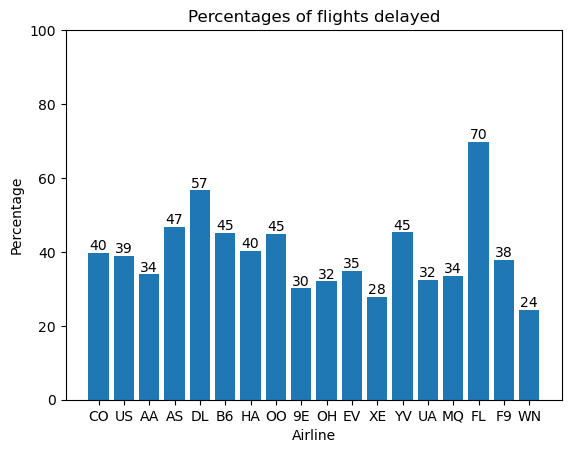

In [8]:
y_result3 = y_val3B.div(y_val3A).multiply(100)

fig, ax = plt.subplots()
bar_container = ax.bar(x_val3, y_result3)
ax.set(ylabel='Percentage', xlabel='Airline' , title='Percentages of flights delayed', ylim=(0, 100))
ax.bar_label(bar_container, fmt='{:,.0f}')

[Text(0, 0, '971'),
 Text(0, 0, '841'),
 Text(0, 0, '1,110'),
 Text(0, 0, '964'),
 Text(0, 0, '702'),
 Text(0, 0, '755'),
 Text(0, 0, '932')]

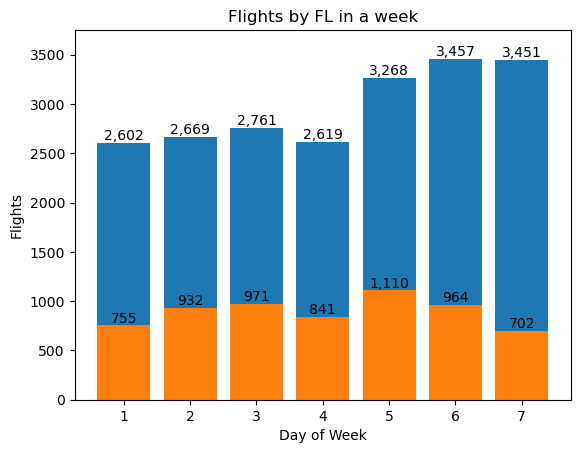

In [31]:
y_result4 = airlines_df[airlines_df['Airline'] == 'FL']
y_result4A = y_result4.groupby(['DayOfWeek'])['Delay'].count()
y_result4B = y_result4.groupby(['DayOfWeek'])['Delay'].sum()
y_result4C = y_result4B.div(y_result4A).multiply(100)

fig, ax = plt.subplots()
bar_container1 = ax.bar(x_val, y_result4A)
bar_container2 = ax.bar(x_val, y_result4B)
ax.set(ylabel='Flights', xlabel='Day of Week' , title='Flights by FL in a week', ylim=(0, 3750))
ax.bar_label(bar_container1, fmt='{:,.0f}')
ax.bar_label(bar_container2, fmt='{:,.0f}')

In [32]:
y_result4.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,20827.000000,20827.000000,20827.000000,20827.000000,20827.000000,20827.000000
mean,272889.326355,648.895904,3.993902,833.154463,131.773899,0.301292
std,156171.627103,427.376952,1.916236,286.434224,45.534468,0.458830
min,160.000000,6.000000,1.000000,315.000000,57.000000,0.000000
25%,138267.500000,281.000000,2.000000,610.000000,99.000000,0.000000
50%,275630.000000,604.000000,4.000000,831.000000,124.000000,0.000000
75%,410282.500000,936.500000,6.000000,1075.000000,152.000000,1.000000
max,539381.000000,1967.000000,7.000000,1439.000000,345.000000,1.000000


[Text(0, 0, '35'),
 Text(0, 0, '32'),
 Text(0, 0, '34'),
 Text(0, 0, '28'),
 Text(0, 0, '20'),
 Text(0, 0, '29'),
 Text(0, 0, '35')]

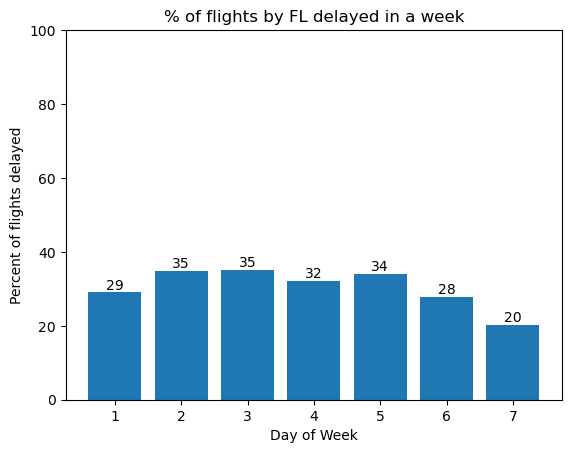

In [33]:
fig, ax = plt.subplots()
bar_container3 = ax.bar(x_val, y_result4C)
ax.set(ylabel='Percent of flights delayed', xlabel='Day of Week' , title='% of flights by FL delayed in a week', ylim=(0, 100))
ax.bar_label(bar_container3, fmt='{:,.0f}')

In [64]:
y_result4D = y_result4.groupby(['Length'])['Delay'].sum()
x_val2 = y_result4['Length'].unique()

In [61]:
y_result4D

Length
57      5
60      5
62      4
63     12
64      0
       ..
320    46
334    12
335     3
342    13
345     7
Name: Delay, Length: 180, dtype: int64

[Text(0, 0.5, 'Number of flights delayed'),
 Text(0.5, 0, 'Flight Duration'),
 Text(0.5, 1.0, '% of flights by FL delayed in a week'),
 (0.0, 100.0)]

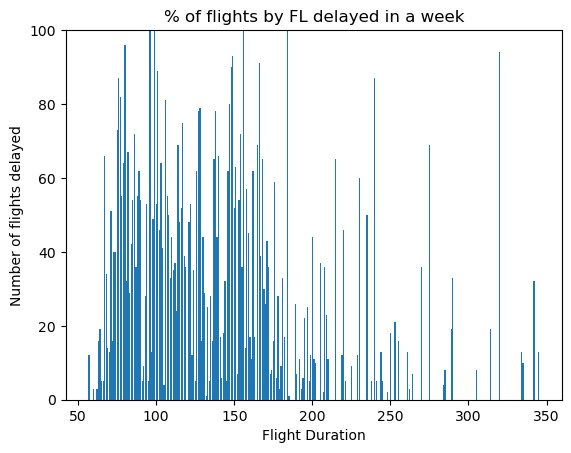

In [68]:
fig, ax = plt.subplots()
bar_container3 = ax.bar(x_val2, y_result4D)
ax.set(ylabel='Number of flights delayed', xlabel='Flight Duration' , title='% of flights by FL delayed in a week', ylim=(0, 100))
#ax.bar_label(bar_container3, fmt='{:,.0f}')

In [65]:
x_val2

array([145, 125, 105, 123, 120, 134, 180, 161,  69, 135,  93,  70, 113,
        83, 112, 126, 102, 119,  95, 131,  85, 167,  89, 129, 108, 107,
       146, 104,  98,  82,  96, 158, 116,  78,  77, 162, 148, 144, 154,
       171, 149, 153, 140, 250, 110, 156, 150, 172, 208,  76,  86, 159,
       184, 130, 240, 101, 127, 128, 176, 133, 138, 166, 100,  81,  94,
        80, 115, 197, 235, 124, 230, 169, 189, 165,  79, 151, 178, 109,
       147,  99,  88, 139, 342, 168, 160, 106, 103,  90, 118,  84, 320,
        68, 121, 209, 290, 275,  75, 137, 114, 122, 215, 155,  71,  97,
       111, 117,  73, 143, 157,  72, 270, 152, 174, 285,  87, 253, 181,
       136, 170,  92, 195, 163,  65, 173, 164,  64, 249, 214, 142,  91,
       141, 132, 179, 248,  66, 334, 203, 196, 221, 192, 207, 175, 261,
       264, 185,  74, 245, 177, 229, 262, 315,  63, 225, 201, 205,  62,
       238, 198, 241, 182, 200, 255,  57, 244, 284, 193,  67, 335, 289,
       314, 305, 219, 210, 202, 194, 220, 199,  60, 345, 190], d